# Chapter 4

## The Core Python Language II


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

np.version.version


'1.21.5'

In [2]:
def process_file(filename):

    try:
        fi = open(filename, "r")

    except IOError:
        print("Oops: couldn't open {} for reading".format(filename))
        return
    else:
        lines = fi.readlines()
        print("{} has {} lines.".format(filename, len(lines)))
        fi.close()
    finally:
        print(" Done with file {}".format(filename))

    print("The first line of {} is:\n{}".format(filename, lines[0]))
    # further processing of the lines ...
    return


process_file("deneme")
process_file("matrix.txt")


Oops: couldn't open deneme for reading
 Done with file deneme
matrix.txt has 5 lines.
 Done with file matrix.txt
The first line of matrix.txt is:
a b c d e



In [3]:
def er(x):
    try:
        y = 1.0 / x
    except ZeroDivisionError:
        print("new Error")
        return
    else:
        print("OK")
    finally:
        print("fin")


er(0)
er(1)


new Error
fin
OK
fin


### P4.1.1


In [4]:
f = open("swallow-speeds.txt")

lines = f.readlines()


def check_line(s):
    if "#" in s:
        raise ValueError()


summ = 0
count = 0
for line in lines:

    try:
        check_line(line)
    except ValueError:
        print("not valid")
    else:
        summ += float(line)
        count += 1
    finally:
        print(summ, count)

print("Ave = ", summ / count)
f.close()



not valid
0 0
not valid
0 0
not valid
0 0
not valid
0 0
10.1 1
22.2 2
32.0 3
40.9 4
51.2 5
60.400000000000006 6
70.0 7
79.2 8
89.3 9
101.0 10
113.0 11
123.0 12
not valid
123.0 12
131.8 13
143.70000000000002 14
155.70000000000002 15
not valid
155.70000000000002 15
165.60000000000002 16
175.40000000000003 17
185.60000000000002 18
Ave =  10.311111111111112


### P4.1.2


In [5]:
def str_vector(v):

    assert type(v) is list or type(v) is tuple, "argument to str_vector must be a list or tuple"
    assert len(v) in (2, 3), "vector must be 2D or 3D in str_vector"

    unit_vectors = ["i", "j", "k"]
    s = []
    for i, component in enumerate(v):
        s.append("{}{}".format(component, unit_vectors[i]))
    return " + ".join(s).replace("+ -", "- ")


print(str_vector([-2, -8]))



-2i - 8j


### P4.1.3


In [6]:
def powr(a, b):

    if a == 0 and b == 0:
        raise ValueError("Both can not be zero")

    else:
        return a ** b

print(powr(5, 4))
# print(powr(0,0))



625


In [7]:
ordinal = dict([(1, "First"), (2, "Second"), (3, "Third")])
for c in ordinal.items():
    print(c)
    # print(ordinal[c])



(1, 'First')
(2, 'Second')
(3, 'Third')


In [8]:
def pfunct(**kargs):

    print(kargs)


pfunct(a1=3, b2=4, c3=6)



{'a1': 3, 'b2': 4, 'c3': 6}


In [9]:
print(type([1, 2, 3]))
print(type((1, 2, 3)))
print(type({1: 5, 2: 6, 3: 7}))
print(type({1, 2, 3}))



<class 'list'>
<class 'tuple'>
<class 'dict'>
<class 'set'>


In [10]:
[True] * 9



[True, True, True, True, True, True, True, True, True]

### E4.9


In [11]:
import math


def primes(n):

    """ Return a list of the prime numbers <= n. """

    sieve = [True] * (n // 2)
    for i in range(3, int(math.sqrt(n)) + 1, 2):
        if sieve[i // 2]:
            sieve[i * i // 2 :: i] = [False] * ((n - i * i - 1) // (2 * i) + 1)
    return [2] + [2 * i + 1 for i in range(1, n // 2) if sieve[i]]


primes(100)


[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

In [12]:
n = 30
sieve = [True] * (n // 2)
print(sieve)
i = 5


sieve[i * i // 2 :: i] = [False] * ((n - i * i - 1) // (2 * i) + 1)
print(sieve)


[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True, True, True, True, False, True, True]


### Misc


In [13]:
bb = 987
bb.as_integer_ratio()



(987, 1)

### E4.7


In [14]:
planets = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]
planet_to_initial = {planet: planet[0] for planet in planets}
planet_to_initial



{'Mercury': 'M',
 'Venus': 'V',
 'Earth': 'E',
 'Mars': 'M',
 'Jupiter': 'J',
 'Saturn': 'S',
 'Uranus': 'U',
 'Neptune': 'N'}

In [15]:
"Mercury" in planet_to_initial



True

In [16]:
"M" in planet_to_initial.values()



True

In [17]:
import pandas as pd

data = pd.read_csv("ex2-6-g-esi-data.csv")
data



,name,mass,radius,density,g,v_esc,a,Tsurf,Teq
0,Earth,1.0000,1.00,1.00,1.00,1.00,1.00,288,254
1,Mars,0.1070,0.53,0.71,0.38,0.45,1.52,227,210
2,Mercury,0.0553,0.38,0.98,0.38,0.38,0.39,440,434
3,Moon,0.0123,0.27,0.60,0.17,0.21,1.00,220,255
4,Venus,0.8150,0.95,0.95,0.90,0.93,0.72,730,232
5,Io,0.0150,0.29,0.64,0.18,0.23,5.20,130,112
6,Jupiter,318.0000,10.97,0.24,2.64,5.38,5.20,152,110
7,Titan,0.0225,0.40,0.34,0.14,0.24,9.54,94,83
8,GJ581g,3.1000,1.36,1.22,1.67,1.51,0.15,278,248
9,GJ581b,15.6000,3.14,0.51,1.59,2.23,0.04,499,469


In [18]:
["${}".format(x) for x in range(10)]



['$0', '$1', '$2', '$3', '$4', '$5', '$6', '$7', '$8', '$9']

In [19]:
full_dataset = [
    {"name": "Peach", "items": ["green shell", "banana", "green shell"], "finish": 3},
    {"name": "Peach", "items": ["green shell", "banana", "green shell"], "finish": 1},
    {"name": "Bowser", "items": ["green shell"], "finish": 1},
    {"name": None, "items": ["green shell"], "finish": 2},
    {"name": "Bowser", "items": ["green shell"], "finish": 1},
    {"name": None, "items": ["red shell"], "finish": 1},
    {"name": "Yoshi", "items": ["banana", "blue shell", "banana"], "finish": 7},
    {"name": "DK", "items": ["blue shell", "star"], "finish": 1},
]



In [20]:
def best_items(racers):
    winner_item_counts = {}
    for i in range(len(racers)):
        # The i'th racer dictionary
        racer = racers[i]
        # print(racer)
        # We're only interested in racers who finished in first
        if racer["finish"] == 1:
            for j in racer["items"]:
                # Add one to the count for this item (adding it to the dict if necessary)
                if j not in winner_item_counts:
                    winner_item_counts[j] = 0
                winner_item_counts[j] += 1

        # Data quality issues :/ Print a warning about racers with no name set. We'll take care of it later.
        if racer["name"] is None:
            print(
                "WARNING: Encountered racer with unknown name on iteration {}/{} (racer = {})".format(
                    i + 1, len(racers), racer["name"]
                )
            )
    return winner_item_counts


best_items(full_dataset)


{'green shell': 4, 'banana': 1, 'red shell': 1, 'blue shell': 1, 'star': 1}

Hash Fuction


In [21]:
print(hash(1.0))
print(hash(1))
print(hash(1.000000))
print(hash(1.000001))

2305843009025 == hash(1.000001)


1
1
1
2305843009025


True

### Q4.2.1


In [22]:
my_set1 = set("abcdefghijklmnoprstuvyz")
my_set2 = set("The quick brown fox jumped over the lazy dog")
alpabet = set("abcdefghijklmnopqrstuvwxyz")
type(alpabet)
len(alpabet.difference(my_set2)) == 0


False

### Q4.2.2


In [23]:
def remove_dupes(s):
    return sorted(list(set(s)))


remove_dupes([10, 1, 1, 2, 3, 4, 4, 4, 5, 7, 8, 8, 9])



[1, 2, 3, 4, 5, 7, 8, 9, 10]

### Q4.2.3


In [24]:
print(set("hellohellohello"))
print(set(["hellohellohello"]))
print(set(("hellohellohello",)))
print(set(("hello", "hello", "hello")))
print(set(("hello", ("hello", "hello"))))
# print(set(('hello', ['hello', 'hello'])))


{'o', 'l', 'e', 'h'}
{'hellohellohello'}
{'hellohellohello'}
{'hello'}
{('hello', 'hello'), 'hello'}


In [25]:
a = frozenset((1, 2, 3))
print(id(a))
a |= {2, 3, 4, 5}
print(id(a))


2733088138048
2733088139392


### Q4.2.5


In [26]:
text = "Four score and seven years ago our fathers brought forth on this continent , a new nation , conceived in Liberty , and dedicated to the proposition that all men are created equal"
text = text.replace(",", "").lower()  # remove punctuation
word_lengths = {}


for word in text.split():
    try:
        word_lengths[len(word)] += 1
    except KeyError:
        word_lengths[len(word)] = 1
print(word_lengths)

word_lengths = {}
for word in text.split():
    word_lengths[len(word)] = word_lengths.setdefault(len(word), 0) + 1
print(word_lengths)

# Using defaultdict in this case would be more concise and elegant:
word_lengths = {}
for word in text.split():
    word_lengths[len(word)] = word_lengths.setdefault(len(word), [])
    word_lengths[len(word)].append(word)
print(word_lengths)

from collections import defaultdict

word_lengths = defaultdict(list)
for word in text.split():
    word_lengths[len(word)].append(word)
print(word_lengths)


{4: 3, 5: 5, 3: 9, 7: 4, 2: 3, 9: 3, 1: 1, 6: 1, 11: 1}
{4: 3, 5: 5, 3: 9, 7: 4, 2: 3, 9: 3, 1: 1, 6: 1, 11: 1}
{4: ['four', 'this', 'that'], 5: ['score', 'seven', 'years', 'forth', 'equal'], 3: ['and', 'ago', 'our', 'new', 'and', 'the', 'all', 'men', 'are'], 7: ['fathers', 'brought', 'liberty', 'created'], 2: ['on', 'in', 'to'], 9: ['continent', 'conceived', 'dedicated'], 1: ['a'], 6: ['nation'], 11: ['proposition']}
defaultdict(<class 'list'>, {4: ['four', 'this', 'that'], 5: ['score', 'seven', 'years', 'forth', 'equal'], 3: ['and', 'ago', 'our', 'new', 'and', 'the', 'all', 'men', 'are'], 7: ['fathers', 'brought', 'liberty', 'created'], 2: ['on', 'in', 'to'], 9: ['continent', 'conceived', 'dedicated'], 1: ['a'], 6: ['nation'], 11: ['proposition']})


### P4.2.1


In [27]:
def get_resistor_value(r):
    resitor_table = {
        "bk": [0, 1, 0],
        "br": [1, 10, 0.01],
        "rd": [2, 100, 0.02],
        "or": [3, 1000, 0],
        "yl": [4, 10000, 0.05],
        "gr": [5, 100000, 0.005],
        "bl": [6, 1000000, 0.0025],
        "vi": [7, 10000000, 0.001],
        "gy": [8, 100000000, 0.0005],
        "wh": [9, 1000000000, 0],
        "au": [0, 0, 0.005],
        "ag": [0, 0, 0.1],
        None: [0, 0, 0.2],
    }
    number = []
    for i, s in enumerate(r):
        if i >= 1:
            i = i - 1
        number.append(resitor_table[s][i])
    return ((number[0] * 10 + number[1]) * number[2], number[3])


print(get_resistor_value(["vi", "yl", "rd", "gr"]))



(7400, 0.005)


In [28]:
f = open("./2701-0.txt", "r", encoding="utf-8")
# Iterate over the preamble until we get to the book text
# for line in f:
#     if 'START OF THIS PROJECT GUTENBERG EBOOK' in line:
#         break

# wordcount is a dictionary of word-counts, keyed by word
wordcount = {}
for line in f:
    if "END OF THIS PROJECT GUTENBERG EBOOK" in line:
        # That's the text of the novel done: bail before the licence text, etc.
        break
    # Strip out the line endings and force everything to lower case
    line = line.strip().lower()
    # Some words are separated by --: replace this with ' '; similarly
    # remove 's (for possessives) and swap out & for and
    line = line.replace("--", " ").replace("'s", "").replace("&", "and")
    # Strip any of the following punctuation
    for c in "!?\":;,()'.*[]":
        line = line.replace(c, "")

    # The line is (reasonably) clean: split it into words
    words = line.split(" ")
    for word in words:
        if not word:
            # Ignore words without any letters!
            continue
        # Update the wordcount dictionary, creating a new entry if necessary
        try:
            wordcount[word] += 1
        except KeyError:
            wordcount[word] = 1
# print(wordcount)
wc = []
# For a sorted list of word frequencies, create a list of (count, word) tuples
for k, v in wordcount.items():
    wc.append((v, k))
# Sort it into decreasing order
wc.sort(reverse=True)

# Output the 100 most frequent words from the top of the wc list
for i in range(100):
    print("{:10s}: {:d}".format(wc[i][1], wc[i][0]))
    # print(wc)
f.close()

the       : 14529
of        : 6713
and       : 6410
a         : 4665
to        : 4654
in        : 4188
that      : 2905
his       : 2514
it        : 2322
i         : 1844
with      : 1763
but       : 1741
as        : 1726
is        : 1718
he        : 1715
was       : 1637
for       : 1614
all       : 1468
this      : 1395
at        : 1320
by        : 1216
not       : 1144
from      : 1103
be        : 1052
on        : 1045
so        : 1031
him       : 1010
whale     : 917
you       : 914
one       : 885
or        : 792
had       : 776
have      : 769
now       : 730
there     : 716
were      : 680
they      : 652
which     : 644
their     : 619
are       : 612
some      : 611
then      : 597
when      : 593
an        : 593
me        : 592
my        : 574
like      : 571
upon      : 564
no        : 547
into      : 522
out       : 510
up        : 505
more      : 500
what      : 491
if        : 486
them      : 454
old       : 441
we        : 439
would     : 427
been      : 415
other     : 

### P4.2.2


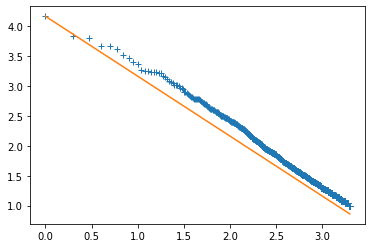

In [73]:
md = open("./2701-0.txt", "r", encoding="utf-8")

dictionary = {}
for line in md:
    line = line.strip().lower()

    # Some words are separated by --: replace this with ' '; similarly
    # remove 's (for possessives) and swap out & for and
    line = line.replace("--", " ").replace("'s", "").replace("&", "and")

    # Strip any of the following punctuation
    for c in "!?\":;,()'.*[]":
        line = line.replace(c, "")

    # The line is (reasonably) clean: split it into words
    words = line.split(" ")
    for word in words:
        dictionary[word] = dictionary.setdefault(word, 0) + 1
md.close()

value_list = list(dictionary.values())
value_list.sort(reverse=True)
top_values = value_list[:100]

# for val in top_values:
#     print(list(dictionary.keys())[list(dictionary.values()).index(val)])

rank = np.linspace(1, 2000, 2000)
freq = value_list[:2000]
x_log = np.log10(rank)
y_obsrved = np.log10(freq)
y_pred = np.log10(freq[0]) - x_log
plt.plot(x_log, y_obsrved, "+", label="Observed")
plt.plot(x_log, y_pred, label="Predicted")
plt.show()

### P4.2.3


In [30]:
def get_vars(stack):
    return stack.pop(), stack.pop()


def plus(stack):
    b, a = get_vars(stack)
    stack.append(a + b)


def minus(stack):
    b, a = get_vars(stack)
    stack.append(a - b)


def multiply(stack):
    b, a = get_vars(stack)
    stack.append(a * b)


def divide(stack):
    b, a = get_vars(stack)
    stack.append(a / b)


def calculate(s):
    s = s.split()
    tokens = {"+": plus, "-": minus, "*": multiply, "/": divide}

    # a, b = None, None
    # result = None
    # for i in s:
    #     if i in tokens:
    #         result = tokens[i](a, b)
    #         a = result
    #     elif i not in tokens and a == None:
    #         a = float(i)
    #     else:
    #         b = float(i)

    stack = []
    for i in s:
        # print(i,stack)
        if i in tokens:
            tokens[i](stack)
        else:
            stack.append(float(i))

    return stack[0]


print(calculate("2 3 * 4 * 5 / 10 - 25 *"))
print(((2 * 3 * 4 / 5) - 10) * 25)



-130.0
-130.0


### 4.2.4


In [31]:
morse = dict(
    (
        ("A", ".-"),
        ("B", "-..."),
        ("C", "-.-."),
        ("D", "-.."),
        ("E", "."),
        ("F", "..-."),
        ("G", "--."),
        ("H", "...."),
        ("I", ".."),
        ("J", ".---"),
        ("K", "-.-"),
        ("L", ".-.."),
        ("M", "--"),
        ("N", "-."),
        ("O", "---"),
        ("P", ".--."),
        ("Q", "--.-"),
        ("R", ".-."),
        ("S", "..."),
        ("T", "-"),
        ("U", "..-"),
        ("V", "...-"),
        ("W", ".--"),
        ("X", "-..-"),
        ("Y", "-.--"),
        ("Z", "--.."),
        ("1", ".----"),
        ("2", "..---"),
        ("3", "...--"),
        ("4", "....-"),
        ("5", "....."),
        ("6", "-...."),
        ("7", "--..."),
        ("8", "---.."),
        ("9", "----."),
        ("0", "-----"),
    )
)

s = ".--. -.-- - .... --- -. / ...--"
word_list = s.split(" ")
print(word_list)
word = ""
for w in word_list:
    if w == "/":
        print(" ")
    else:
        print(list(morse.keys())[list(morse.values()).index(w)])


['.--.', '-.--', '-', '....', '---', '-.', '/', '...--']
P
Y
T
H
O
N
 
3


In [32]:
revmorse = {}
for k, v in morse.items():
    revmorse[v] = k


def msg_to_morse(msg):
    morse_msg = []
    for c in msg.upper():
        if c == " ":
            morse_msg.append("/")
        else:
            try:
                morse_msg.append(morse[c])
            except KeyError:
                morse_msg.append("*")
    return " ".join(morse_msg)


def morse_to_msg(msg):
    decoded_msg = []
    for word in morse_msg.split("/"):
        decoded_word = []
        for c in word.split(" "):
            if c:
                try:
                    decoded_word.append(revmorse[c])
                except KeyError:
                    decoded_word.append("*")
        decoded_word = "".join(decoded_word)
        decoded_msg.append(decoded_word)
    return " ".join(decoded_msg)


msg = "PYTHON 3"
morse_msg = msg_to_morse(msg)
decoded_msg = morse_to_msg(morse_msg)
print(morse_msg)
print(decoded_msg)



.--. -.-- - .... --- -. / ...--
PYTHON 3


### P.4.2.5


In [33]:
shark = open("shark-species.txt", "r")
text = shark.readlines()
contents = []
for line in text:
    line_new = line.strip("\n").replace("    ", "\t")
    # print(line_new.count("\t"), line_new.count(":"))
    contents.append(line_new)

species = {}
for item in contents:
    num_tab = item.count("\t")
    if num_tab == 0:
        dumm = item
        species[dumm] = {}
        # print(species)
    elif num_tab == 1:
        dumm1 = item.strip("\t")
        species[dumm][dumm1] = {}
        # print(species)
    elif num_tab == 2:
        dumm2 = item.strip("\t")
        species[dumm][dumm1][dumm2] = {}
        # print(species)
    elif num_tab == 3:
        a, b = item.split(":")
        a = a.strip("\t")
        a = a.split()
        a = "{}. {}".format(a[0][0], a[1].strip(" "))
        b = b.strip(" ")
        species[dumm][dumm1][dumm2][a] = b

shark.close()


In [34]:
species["Carcharhiniformes"]["Carcharhinidae"]["Carcharhinus"]["C. acronotus"]


'Blacknose shark'

In [35]:
species["Lamniformes"]["Lamnidae"]["Carcharodon"]["C. carcharias"]



'Great white shark'

## Syntactic Sugar


### Assignment Shortcuts


In [36]:
a = b = [1, 2]
print(a is b)
print(id(a), id(b))
x = -1
y = math.sin(x) / x if x else 1
y


True
2733096766848 2733096766848


0.8414709848078965

### List Comprehension


In [37]:
xlist = [1, 2, 3, 4, 5, 6]
print([x ** 2 for x in xlist if x % 2])
print([x ** 2 if x % 2 else x ** 3 for x in xlist])


[1, 9, 25]
[1, 8, 9, 64, 25, 216]


In [38]:
m = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
mt = [[row[i] for row in m] for i in range(3)]
mt


[[1, 4, 7], [2, 5, 8], [3, 6, 9]]

### Lamda Functions


In [39]:
f = lambda x, y: x ** 2 - 3 * x + 2 * y
print(f(4.0, 8))



20.0


In [40]:
flist = [lambda x: 1, lambda x: x, lambda x: x ** 2, lambda x: x ** 3]
flist[2](5)


25

### Generators


In [41]:
def count(n):
    i = 0
    while i < n:
        i += 1
        yield i


cnt = count(5)

for i in cnt:
    print(i ** 2)

for i in cnt:
    print(i ** 2)


1
4
9
16
25


In [42]:
squares = [x ** 2 for x in range(5)]


In [43]:
squares


[0, 1, 4, 9, 16]

In [44]:
type({x ** 2 for x in range(5)})



set

In [45]:
# [a] List
# (a) Tuple
# {a} Set
# {a:b} Dict
# [a for a] List Comprehension
# (a for a) Generator comprehension
# {a for a} Set Comprehension
# {a:b for a} Dict Comprehension


### map, filter and reduce


In [46]:
lst = [[1, 3, 1], [4, 5, 2]]
list(filter(lambda x: x > 5, map(sum, lst)))



[11]

### walrus operator


In [47]:
if (slen := len(s)) > 10:
    print(f"s has {slen} characters. The maximum is 10.")



s has 31 characters. The maximum is 10.


### Q4.3.1


In [48]:
list1 = [lambda x: 1, lambda x: x, lambda x: x ** 2, lambda x: x ** 3]
print(list1[0](4))
list2 = [(lambda x, i=y: x ** i) for y in range(4)]
print(list2[0](4))


1
1


### Q4.3.2


In [49]:
nmax = 5
x = [1]
for n in range(1, nmax + 2):
    print(x)
    x = [([0] + x)[i] + (x + [0])[i] for i in range(n + 1)]



[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]


### Q4.3.3


In [50]:
a = ["A", "B", "C", "D", "E", "F", "G"]
b = [4, 2, 6, 1, 5, 0, 3]
print([a[x] for x in b])
print([a[x] for x in sorted(b)])
print([a[b[x]] for x in b])
sorted(zip(b, a))
[x for (y, x) in sorted(zip(b, a))]


['E', 'C', 'G', 'B', 'F', 'A', 'D']
['A', 'B', 'C', 'D', 'E', 'F', 'G']
['F', 'G', 'D', 'C', 'A', 'E', 'B']


['F', 'D', 'B', 'G', 'A', 'E', 'C']

### Q4.3.3


In [51]:
ordinal = {"five": 5, "one": 1, "four": 4, "two": 2, "three": 3}
print([(x, ordinal[x]) for x in sorted(ordinal.keys())])
print(
    [(list(ordinal.keys())[list(ordinal.values()).index(x)], x) for x in sorted(ordinal.values())]
)

# ordinal.items()
print(sorted([(x, y) for x, y in ordinal.items()], key=lambda item: item[1]))



[('five', 5), ('four', 4), ('one', 1), ('three', 3), ('two', 2)]
[('one', 1), ('two', 2), ('three', 3), ('four', 4), ('five', 5)]
[('one', 1), ('two', 2), ('three', 3), ('four', 4), ('five', 5)]


### Q4.3.5


In [52]:
number = "5558675309"
""" 
1 9 8   (5-x)*2
2 8 6
3 7 4
4 6 2
5 0 5
"""

maf = lambda x: x + ((5 - x) * 2)



In [53]:
[maf(y) for y in range(10)]


[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [54]:
[maf(int(y)) if ((int(y) != 0) and (int(y) != 5)) else (-1 * (int(y) - 5)) for y in number]


[0, 0, 0, 2, 4, 3, 0, 7, 5, 1]

### Q4.3.6


In [55]:
sorted([4, 5, 2, 8, 1], key=lambda x: x ** 2 if x > 4 else x)


[1, 2, 4, 5, 8]

In [56]:
sorted([4, 5, 2, 8, 1, None], key=lambda x: float("inf") if x == None else x)



[1, 2, 4, 5, 8, None]

In [57]:
sorted??

Signature: sorted(iterable, /, *, key=None, reverse=False)
Docstring:
Return a new list containing all items from the iterable in ascending order.

A custom key function can be supplied to customize the sort order, and the
reverse flag can be set to request the result in descending order.
Type:      builtin_function_or_method


### Q.4.3.7


In [58]:
n = 1, 1
while (n := (n[1], n[0] + n[1])) < (5000, 0):
    print(n[1])
    continue


2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765


In [59]:
# while (s := input()) != "exit":
#     print(s.lower())


In [60]:
mat = [[1, 2, 3], [4, 5, 6], [6, 7, 8]]



### P4.3.1


In [61]:
sum([(mat[x][y]) for x in range(3) for y in range(3) if x == y])


14

### P4.3.2


In [62]:
code_text = "can i go home"
[x for x in code_text]


['c', 'a', 'n', ' ', 'i', ' ', 'g', 'o', ' ', 'h', 'o', 'm', 'e']

In [63]:
[chr((ord(x) + 13)) if ord(x) < 110 else chr((ord(x) - 13)) for x in code_text]


['p', 'n', 'a', '-', 'v', '-', 't', 'b', '-', 'u', 'b', 'z', 'r']

In [64]:
"".join([chr((ord(x) - 84) % 26 + 97) if x != " " else " " for x in code_text])


'pna v tb ubzr'

In [65]:
" ".join(["".join([chr((ord(c) - 84) % 26 + 97) for c in w]) for w in code_text.split()])



'pna v tb ubzr'

### P4.3.3


In [66]:
init_cell = [" "] * 79
init_cell[39] = "*"
print(init_cell)
rule_dict = {
    ("*", "*", "*"): " ",
    ("*", "*", " "): " ",
    ("*", " ", "*"): " ",
    ("*", " ", " "): "*",
    (" ", "*", "*"): "*",
    (" ", "*", " "): "*",
    (" ", " ", "*"): "*",
    (" ", " ", " "): " ",
}
for i in range(30):
    init_cell_copy = init_cell.copy()
    print(" ".join(init_cell_copy))
    for i in range(1, 78):
        lookup = tuple(init_cell[i - 1 : i + 2])
        init_cell_copy[i] = rule_dict[lookup]
    init_cell = init_cell_copy.copy()



[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '*', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
                                                                              *                                                                              
                                                                            * * *                                                                            
                                                                          * *     *                                                                          
                                                                        * *   * * * *                                             

In [67]:
import pandas as pd

arr = pd.Series([-1, 0, 1])
list(arr < 0)


[True, False, False]

### P 4.3.4


In [68]:
iban_lengths = {}
with open("iban_lengths.txt") as fi:
    for line in fi.readlines():
        fields = line.split()
        iban_lengths[fields[0]] = int(fields[1])
iban_lengths
# fnl = lambda x: x.split()

# a ={fnl(line)[0]:fnl(line)[1] for line in open('iban_lengths.txt').readlines()}
a = dict(
    {(lambda x: (x[0], int(x[1])))(line.split()) for line in open("iban_lengths.txt").readlines()}
)
a


{'MC': 27,
 'LU': 20,
 'CY': 28,
 'PK': 24,
 'FI': 18,
 'CZ': 24,
 'RO': 24,
 'MD': 24,
 'FR': 27,
 'IL': 23,
 'CH': 21,
 'ES': 24,
 'GB': 22,
 'SA': 24,
 'PS': 29,
 'MK': 19,
 'PL': 28,
 'EE': 20,
 'DE': 22,
 'AZ': 28,
 'PT': 25,
 'SI': 19,
 'HU': 28,
 'HR': 21,
 'LT': 20,
 'NL': 18,
 'NO': 15,
 'LV': 21,
 'FO': 18,
 'KW': 30,
 'SM': 27,
 'MT': 31,
 'MU': 30,
 'GI': 23,
 'BA': 20,
 'LB': 28,
 'GE': 22,
 'QA': 29,
 'GR': 27,
 'AT': 20,
 'IT': 27,
 'BG': 22,
 'SE': 24,
 'GL': 18,
 'TR': 26,
 'BE': 16,
 'TN': 24,
 'LI': 21,
 'AL': 28,
 'AD': 24,
 'RS': 22,
 'SK': 24,
 'JO': 30,
 'DK': 18,
 'BR': 29,
 'IS': 26,
 'ME': 22,
 'IE': 22}

In [69]:
namme = "tim"
print(f"{namme =} {2*namme }")
language = "Python"
school = "freeCodeCamp"
print(f"I'm learning {language = } from {school = }.")


namme ='tim' timtim
I'm learning language = 'Python' from school = 'freeCodeCamp'.


### P4.3.5


In [70]:
sl = list({1, 2, 3})
llc = []

for i in range(len(sl)):
    for j in range(i, len(sl) + 1):
        if i != j:  # print(i,j)
            llc.append(sl[i:j])
llc


[[1], [1, 2], [1, 2, 3], [2], [2, 3], [3]]

In [71]:
def printPowerSet(set, set_size):

    # set_size of power set of a set
    # with set_size n is (2**n -1)
    pow_set_size = (int)(math.pow(2, set_size))
    counter = 0
    j = 0

    # Run from counter 000..0 to 111..1
    for counter in range(0, pow_set_size):
        for j in range(0, set_size):

            # Check if jth bit in the
            # counter is set If set then
            # print jth element from set
            if (counter & (1 << j)) > 0:
                print(set[j], end="")
        print("")


printPowerSet(sl, 3)




1
2
12
3
13
23
123


### 4.3.6


In [72]:
with open("./brown/ca01") as bf:
    bf.readlines()
bf


<_io.TextIOWrapper name='./brown/ca01' mode='r' encoding='cp1252'>